In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 91.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ | done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 86.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 77.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 110.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.2/185.2 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 84.

### **Import necessary Packages**

In [2]:
import os

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from pycaret.classification import *
from matplotlib import pyplot as plt
from sklearn.metrics import *
import seaborn as sns
import pandas as pd
import numpy as np

### **Define multi-class auc score compute function**

In [3]:
def multi_roc_auc_score(gt, pred, average = 'macro'):
    
    ## get unique labels
    src_lb       = set(gt)
    
    
    ## dictionary for roc_auc_score for each label
    roc_auc_dict = {}
    
    for label in src_lb:
        ## list with labels other than src_lb 
        dst_lb      = [lb for lb in src_lb if lb != label]
        
        ## if ground truth label in dst_lb, then new ground truth label is 0,
        ## not in dst_lb, then new ground truth label is 1
        new_gt_lb   = [0 if lb in dst_lb else 1 for lb in gt]
        new_pred_lb = [0 if lb in dst_lb else 1 for lb in pred]
        
        ## calculate roc_auc_score for label
        roc_auc             = roc_auc_score(new_gt_lb, new_pred_lb, average = average)
        roc_auc_dict[label] = f'{roc_auc:.2f}'
        
    return roc_auc_dict
        

In [4]:
df = pd.read_csv('/kaggle/input/migraine-dataset/migraine_data.csv')
df.sample(3).T

,196,279,208
Age,56,40,54
Duration,1,2,1
Frequency,5,1,3
Location,1,1,1
Character,1,1,1
Intensity,3,2,2
Nausea,1,1,1
Vomit,0,0,0
Phonophobia,1,1,1
Photophobia,1,1,1


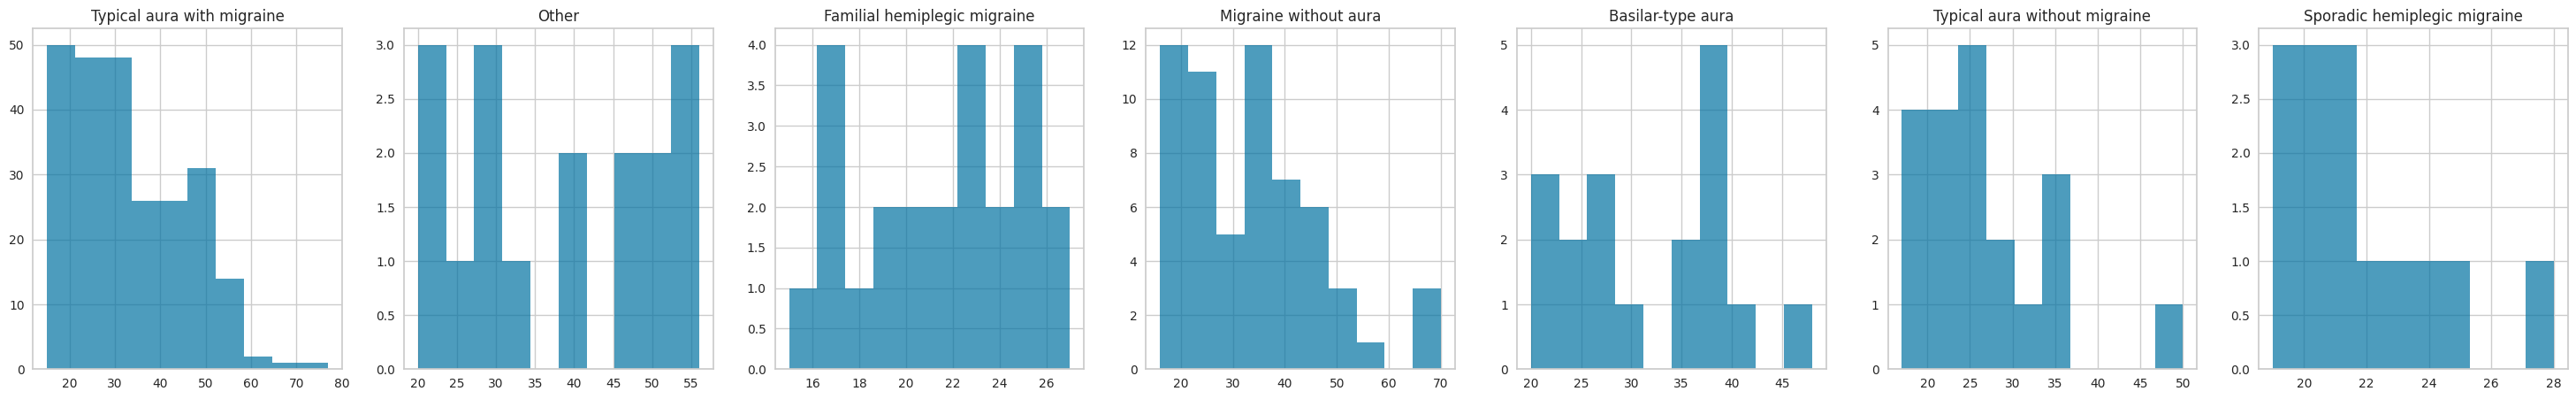

In [5]:
type_   = set(sorted(df.Type))
ages    = set(sorted(df.Age))

_, axes = plt.subplots(1, len(type_), figsize = (5*len(type_) + 2, 5))
for ax, t in zip(axes, type_):
    
    df_ = df[df.Type == t]
    ax.hist(df_.Age, alpha = 0.7)
    ax.set_title(t)

In [6]:
le      = LabelEncoder()
df.Type = le.fit_transform(df.Type)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Age          400 non-null    int64
 1   Duration     400 non-null    int64
 2   Frequency    400 non-null    int64
 3   Location     400 non-null    int64
 4   Character    400 non-null    int64
 5   Intensity    400 non-null    int64
 6   Nausea       400 non-null    int64
 7   Vomit        400 non-null    int64
 8   Phonophobia  400 non-null    int64
 9   Photophobia  400 non-null    int64
 10  Visual       400 non-null    int64
 11  Sensory      400 non-null    int64
 12  Dysphasia    400 non-null    int64
 13  Dysarthria   400 non-null    int64
 14  Vertigo      400 non-null    int64
 15  Tinnitus     400 non-null    int64
 16  Hypoacusis   400 non-null    int64
 17  Diplopia     400 non-null    int64
 18  Defect       400 non-null    int64
 19  Ataxia       400 non-null    int64
 20  Conscience

<Axes: >

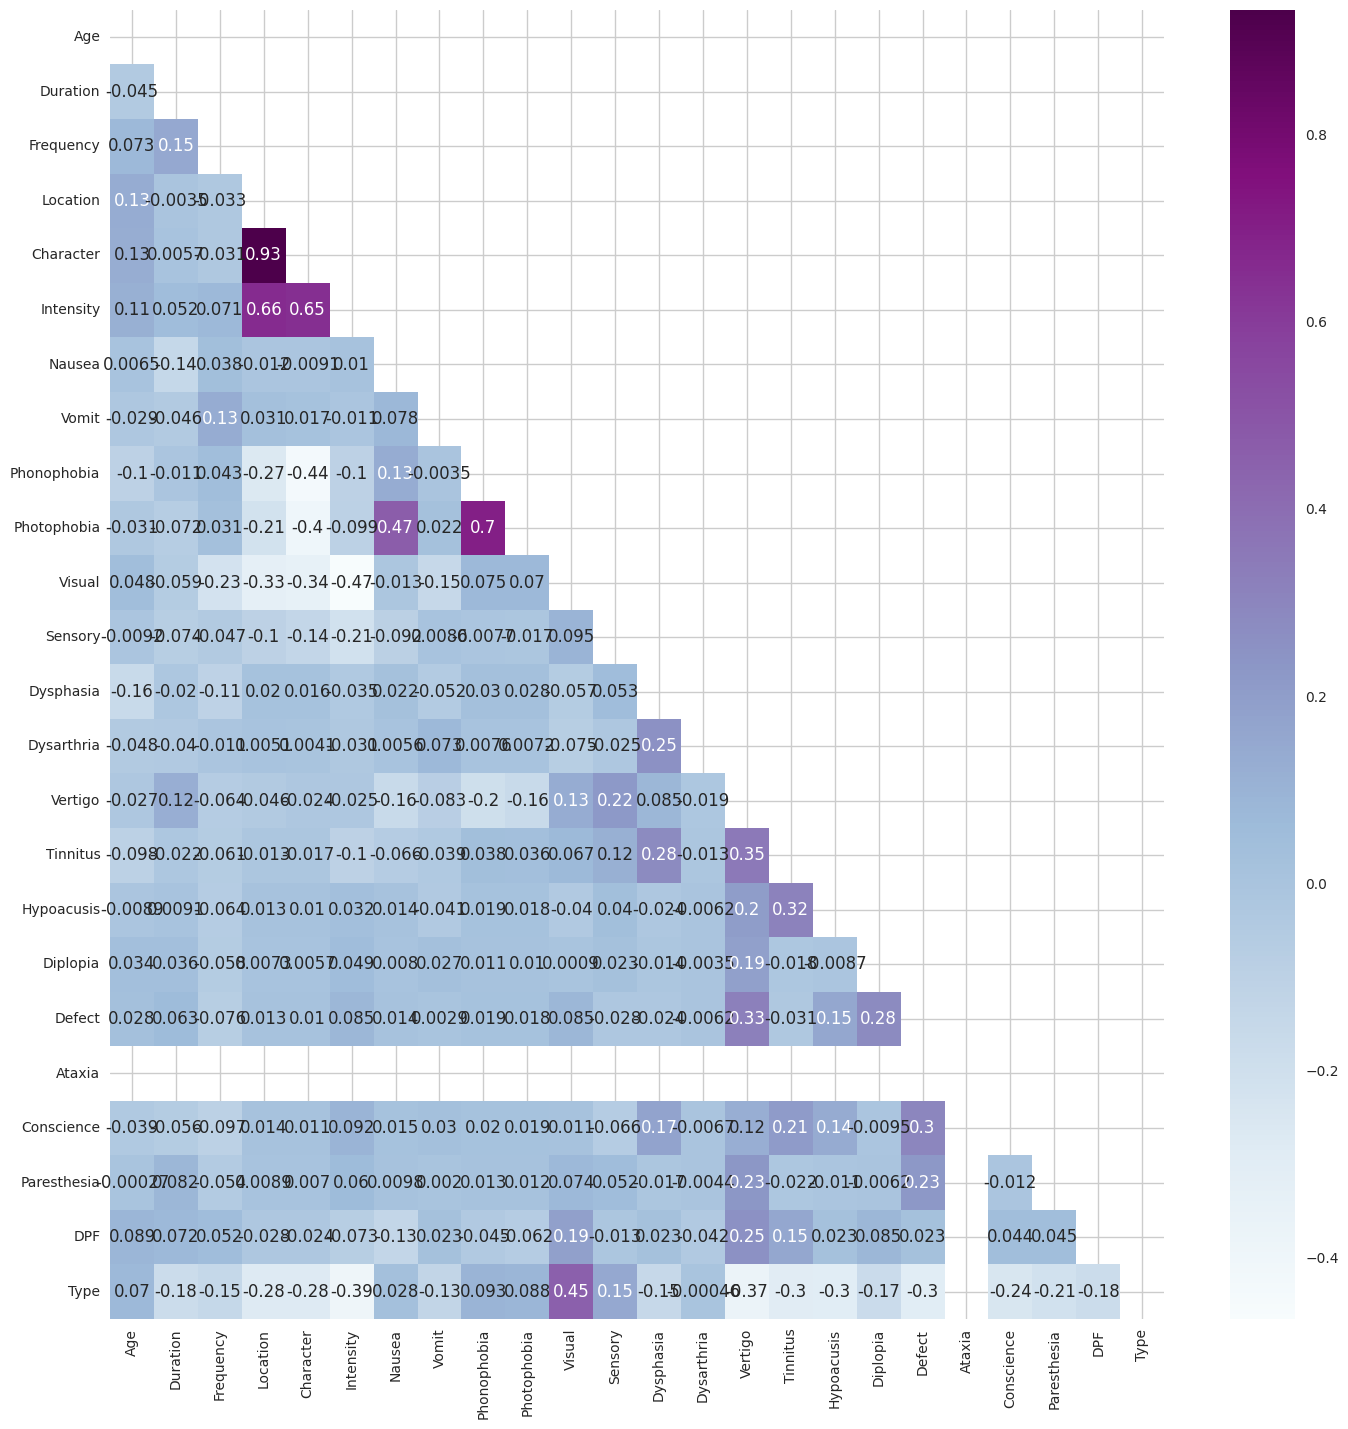

In [7]:
## display heatmap for dataframe correlation coefficient
_, ax = plt.subplots(figsize = (17, 17))
mask  = np.triu(df.corr())
sns.heatmap(df.corr(), mask = mask, annot = True, cmap = 'BuPu')

In [8]:
## drop columns if correlation coefficient less than 0.1
drop_col = ['Age', 'Nausea', 'Phonophobia', 'Photophobia', 'Dysarthria']
y        = df.Type
x        = df.drop(drop_col + ['Type'], axis = 1)
x.sample(3).T

,286,155,146
Duration,2,1,1
Frequency,2,1,3
Location,1,1,1
Character,1,1,1
Intensity,3,3,2
Vomit,0,0,0
Visual,0,2,2
Sensory,1,0,0
Dysphasia,0,0,0
Vertigo,1,0,0


### **Dataset train test split**

In [9]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, stratify = y,
                                                    shuffle = y, random_state = 42)

### **Sample Learning with Random Forest model**

In [10]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)

RandomForestClassifier()

In [11]:
pred = rf.predict(train_x)
print(f'[TRAIN]')
print('accuracy : ', rf.score(train_x, train_y))
print(classification_report(pred, train_y))

pred = rf.predict(test_x)
print(f'[TEST]')
print('accuracy : ', rf.score(test_x, test_y))
print(classification_report(pred, test_y))

[TRAIN]
accuracy :  0.984375
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.79      1.00      0.88        15
           2       1.00      1.00      1.00        48
           3       1.00      0.93      0.97        15
           4       0.91      1.00      0.95        10
           5       1.00      0.98      0.99       202
           6       1.00      1.00      1.00        16

    accuracy                           0.98       320
   macro avg       0.96      0.99      0.97       320
weighted avg       0.99      0.98      0.99       320

[TEST]
accuracy :  0.8875
              precision    recall  f1-score   support

           0       0.25      1.00      0.40         1
           1       0.60      0.50      0.55         6
           2       1.00      0.92      0.96        13
           3       0.67      0.67      0.67         3
           4       0.67      1.00      0.80         2
           5       0.96

### **Training with PyCaret**

In [12]:
## preparing dataset for pycaret training
df_          = df.drop(drop_col, axis = 1)
df_tr, df_te = train_test_split(df_, test_size = 0.2, shuffle = True, random_state = 42)

## PyCaret Classification setup
## apply to smotetomek for imbalanced dataset
caret        = setup(data = df_tr, target = 'Type', session_id = 999,
                     fix_imbalance = True, fix_imbalance_method = 'smotetomek')

,Description,Value
0,Session id,999
1,Target,Type
2,Target type,Multiclass
3,Original data shape,"(320, 19)"
4,Transformed data shape,"(1069, 19)"
5,Transformed train set shape,"(971, 19)"
6,Transformed test set shape,"(96, 19)"
7,Numeric features,18
8,Preprocess,True
9,Imputation type,simple


In [13]:
## get top 3 best models
best_model  = compare_models(n_select = 3)

## get ensemble model with top 3 best models
blend_model = blend_models(best_model)
final_model = finalize_model(blend_model)

## compute metrics for each dataset
pred_tr     = predict_model(final_model, df_tr)
pred_te     = predict_model(final_model, df_te)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8972,0.4860,0.8972,0.8691,0.8788,0.8198,0.8256,0.4730
gbc,Gradient Boosting Classifier,0.8927,0.4887,0.8927,0.8591,0.8694,0.8105,0.8172,2.3280
nb,Naive Bayes,0.8844,0.4823,0.8844,0.8750,0.8714,0.8037,0.8119,0.0940
rf,Random Forest Classifier,0.8798,0.4863,0.8798,0.8332,0.8506,0.7844,0.7946,0.5060
xgboost,Extreme Gradient Boosting,0.8792,0.4830,0.8792,0.8537,0.8600,0.7849,0.7922,0.5540
catboost,CatBoost Classifier,0.8702,0.4830,0.8702,0.8389,0.8494,0.7701,0.7771,6.5590
lightgbm,Light Gradient Boosting Machine,0.8660,0.4885,0.8660,0.8278,0.8404,0.7625,0.7706,3.7070
dt,Decision Tree Classifier,0.8393,0.4250,0.8393,0.8094,0.8181,0.7234,0.7326,0.0910
svm,SVM - Linear Kernel,0.7947,0.0000,0.7947,0.8257,0.7920,0.6724,0.6906,0.0850
lr,Logistic Regression,0.7812,0.4709,0.7812,0.8248,0.7865,0.6573,0.6757,0.1940


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9565,0.9931,0.9565,0.9710,0.9601,0.9299,0.9332
1,0.9130,0.9697,0.9130,0.8942,0.8921,0.8487,0.8552
2,0.8696,0.0000,0.8696,0.8478,0.8551,0.7810,0.7834
3,0.9130,0.0000,0.9130,0.9159,0.9065,0.8482,0.8546
4,0.9545,0.0000,0.9545,0.9121,0.9326,0.9137,0.9187
5,0.8636,0.0000,0.8636,0.8409,0.8485,0.7537,0.7566
6,0.8636,0.0000,0.8636,0.8242,0.8433,0.7412,0.7452
7,0.8636,0.9146,0.8636,0.7644,0.8071,0.7452,0.7558
8,0.9545,0.9913,0.9545,0.9318,0.9394,0.9197,0.9231


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9812,0.9993,0.9812,0.9812,0.9807,0.9675,0.9678


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9250,0.9909,0.9250,0.9513,0.9331,0.8768,0.8795


In [14]:
print('[TRAIN]')
print(classification_report(pred_tr.prediction_label, df_tr.Type))
print(multi_roc_auc_score(pred_tr.prediction_label, df_tr.Type))

print('[TEST]')
print(classification_report(pred_te.prediction_label, df_te.Type))
print(multi_roc_auc_score(pred_te.prediction_label, df_te.Type))

[TRAIN]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.86      0.95      0.90        19
           2       1.00      0.98      0.99        48
           3       0.85      1.00      0.92        11
           4       0.92      1.00      0.96        11
           5       1.00      0.98      0.99       202
           6       1.00      1.00      1.00        17

    accuracy                           0.98       320
   macro avg       0.95      0.99      0.96       320
weighted avg       0.98      0.98      0.98       320

{0: '1.00', 1: '0.97', 2: '0.99', 3: '1.00', 4: '1.00', 5: '0.99', 6: '1.00'}
[TEST]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.50      0.67         6
           2       1.00      1.00      1.00        13
           3       0.75      1.00      0.86         3
           4       0.50      0.33      